## Long Island Hedonic Analysis - Draft
### Visualizing the data
#### created by Doug Patton
<br>
If you run the notebook with matplotlib widgets turned on (and installed), you can rotate and zoom in on the 3d plots. 

In [1]:
import island

In [2]:
import numpy as np
import pandas as pd

In [3]:
#from importlib import reload  
#reload(island)

In [4]:
%matplotlib inline
#may be necessary to display plots inline on some systems
#%pylab #interactive graphs in external window
#%matplotlib widget #makes graphs interactive inline

In [5]:
idata_obj=island.IslandData()

In [6]:
idata_obj.getDataFromCSV() # run once

opening /home/dp/hdd2/gits/island/data/PreSandy.csv with length:23174 and type:<class 'list'>
opening /home/dp/hdd2/gits/island/data/PostSandy.csv with length:8799 and type:<class 'list'>


In [7]:
idata_obj.doCSVToDict() # run once

In [8]:
idata_obj.makeTimeListArrayList()

In [9]:
#create new real version for each dollar variable using the CPI
baseyear=2015
idata_obj.addRealByCPI(to_year=baseyear)


In [10]:
idata_obj.arrayListToPandasDF()

In [11]:
idata_obj.doDistanceVars()

In [12]:
#idata_obj.justMakeWeights()

In [13]:
for scope in ['year']:
    for est in ['OLS', 'GM_Error_Het']:
        idata_obj.modeldict['modeltype']=est
        idata_obj.modeldict['NNscope']=scope
        idata_obj.runModel()

In [14]:
#idata_obj.printModelSummary()
idata_obj.printModelSummary(stars=1)

r2val 0.5195718 r2round 0.52 modeltype OLS
r2val 0.44612074 r2round 0.446 modeltype OLS
r2val 0.5183238311241709 r2round 0.518 modeltype GM_Error_Het
r2val 0.44494530659255765 r2round 0.445 modeltype GM_Error_Het


/home/dp/hdd2/gits/island/island_effects.py:389: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65,ha='right')


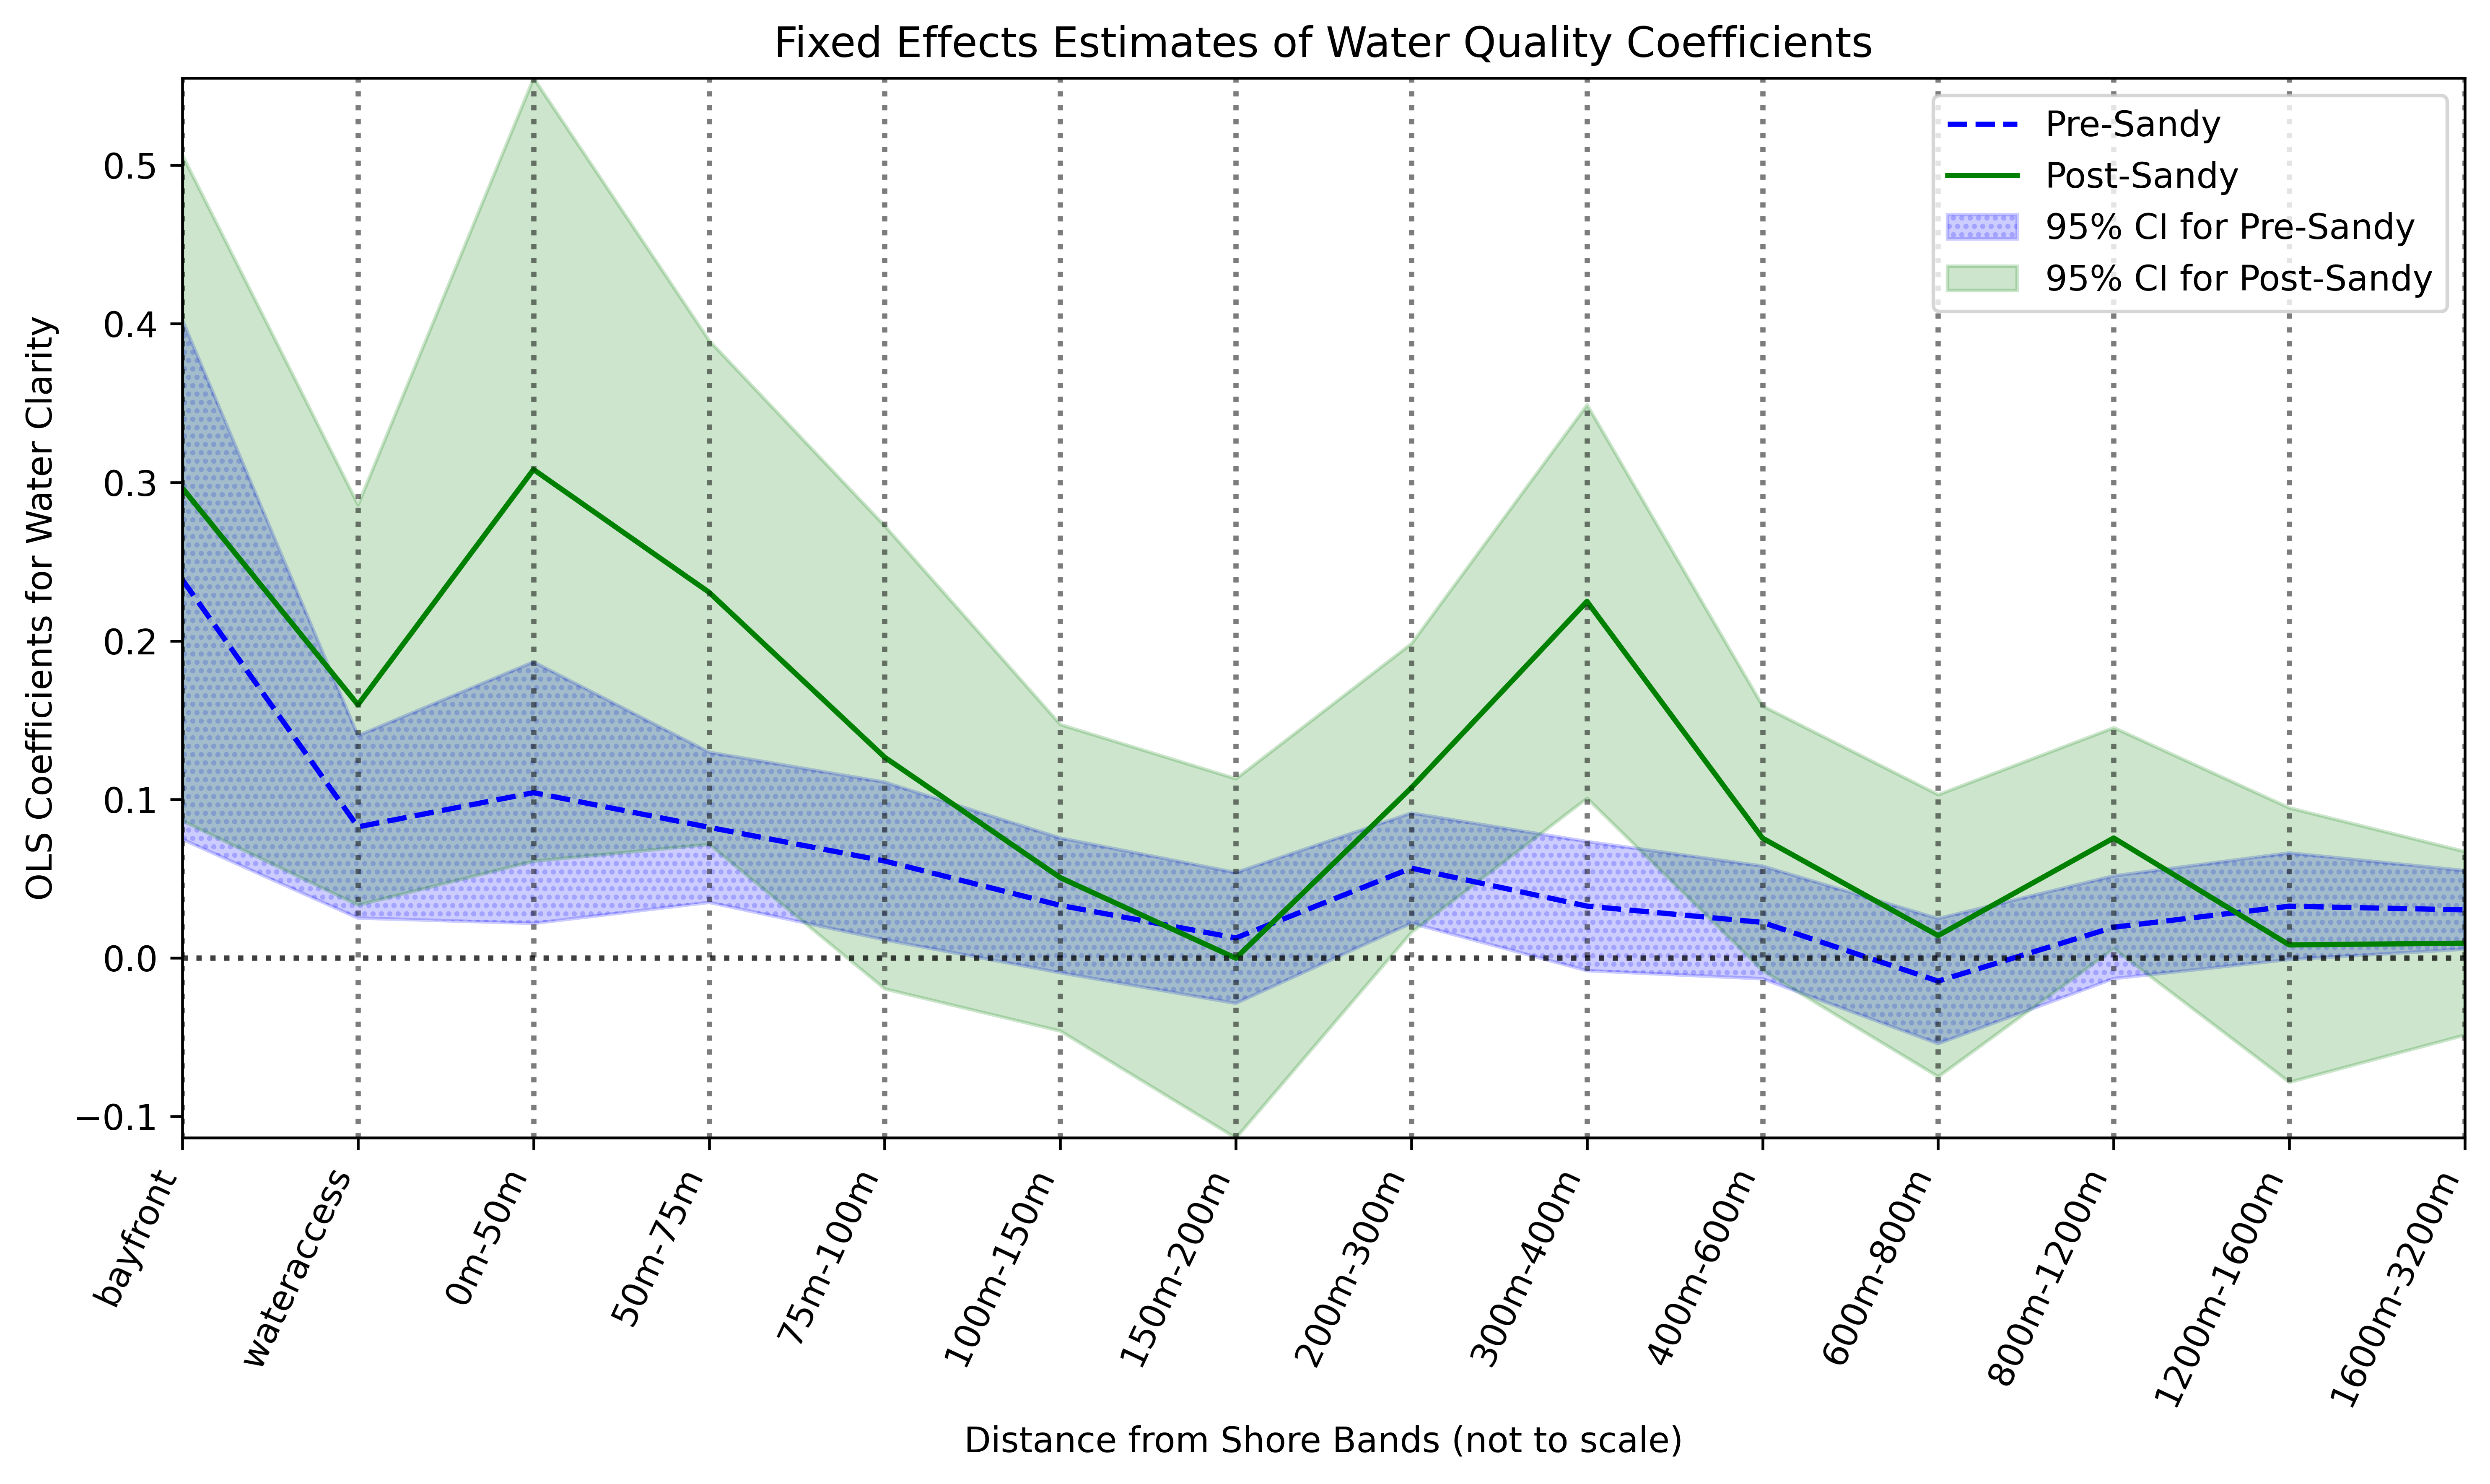

In [15]:
idata_obj.createWQGraph()

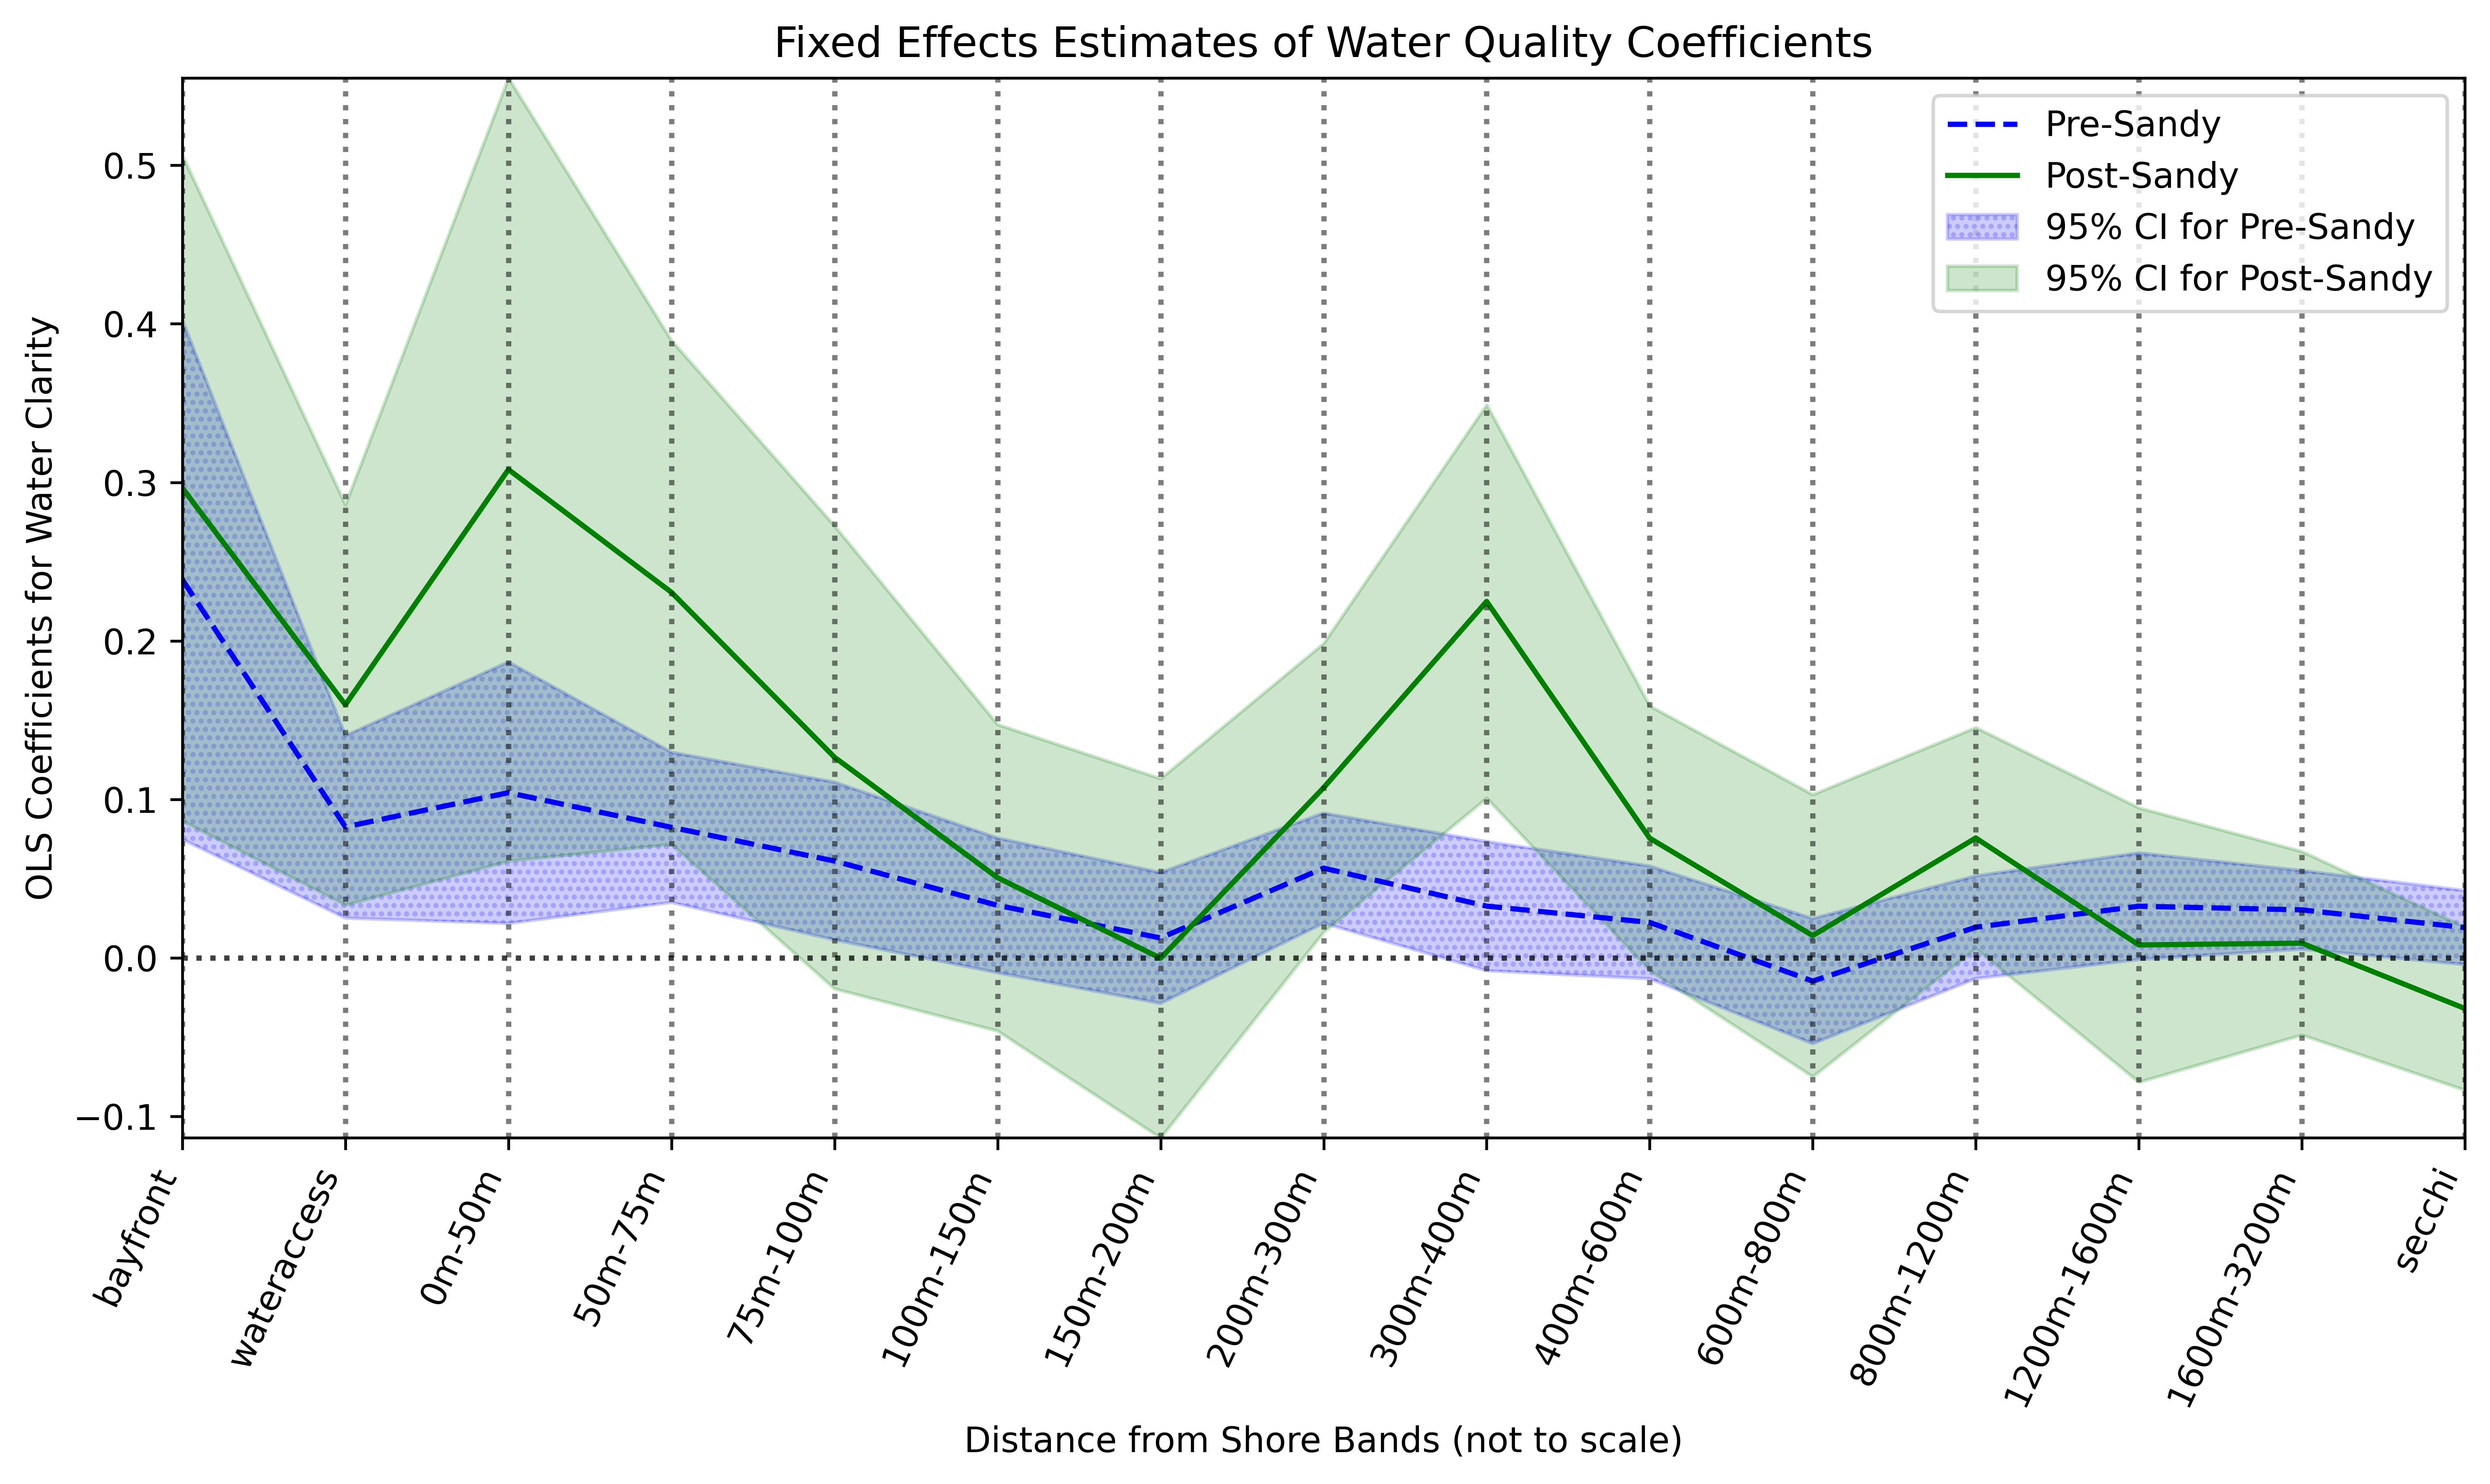

In [16]:
idata_obj.xlabel_rotate=75
idata_obj.createWQGraph(modeltype='ols',drop_wateraccess=False,drop_secchi=False)

annual_dist_avg_effects for period-0, r=0.03

                                   effect
bayfront                           3057.0
wateraccess                         569.0
Distance to Shoreline 0m-50m        580.0
Distance to Shoreline 50m-75m       515.0
Distance to Shoreline 75m-100m      416.0
Distance to Shoreline 100m-150m     264.0
Distance to Shoreline 150m-200m     158.0
Distance to Shoreline 200m-300m     400.0
Distance to Shoreline 300m-400m     280.0
Distance to Shoreline 400m-600m     216.0
Distance to Shoreline 600m-800m      24.0
Distance to Shoreline 800m-1200m    188.0
Distance to Shoreline 1200m-1600m   230.0
Distance to Shoreline 1600m-3200m   224.0
Distance to Shoreline 3200m-4000m    81.0
weighted grand average effect for p-0, r=0.03,
 effect    249.150168
dtype: float64
annual_dist_avg_effects for period-1, r=0.03

                                   effect
bayfront                           3141.0
wateraccess                         718.0
Distance to Shoreline 0m-5

/home/dp/hdd2/gits/island/island_effects.py:341: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right')


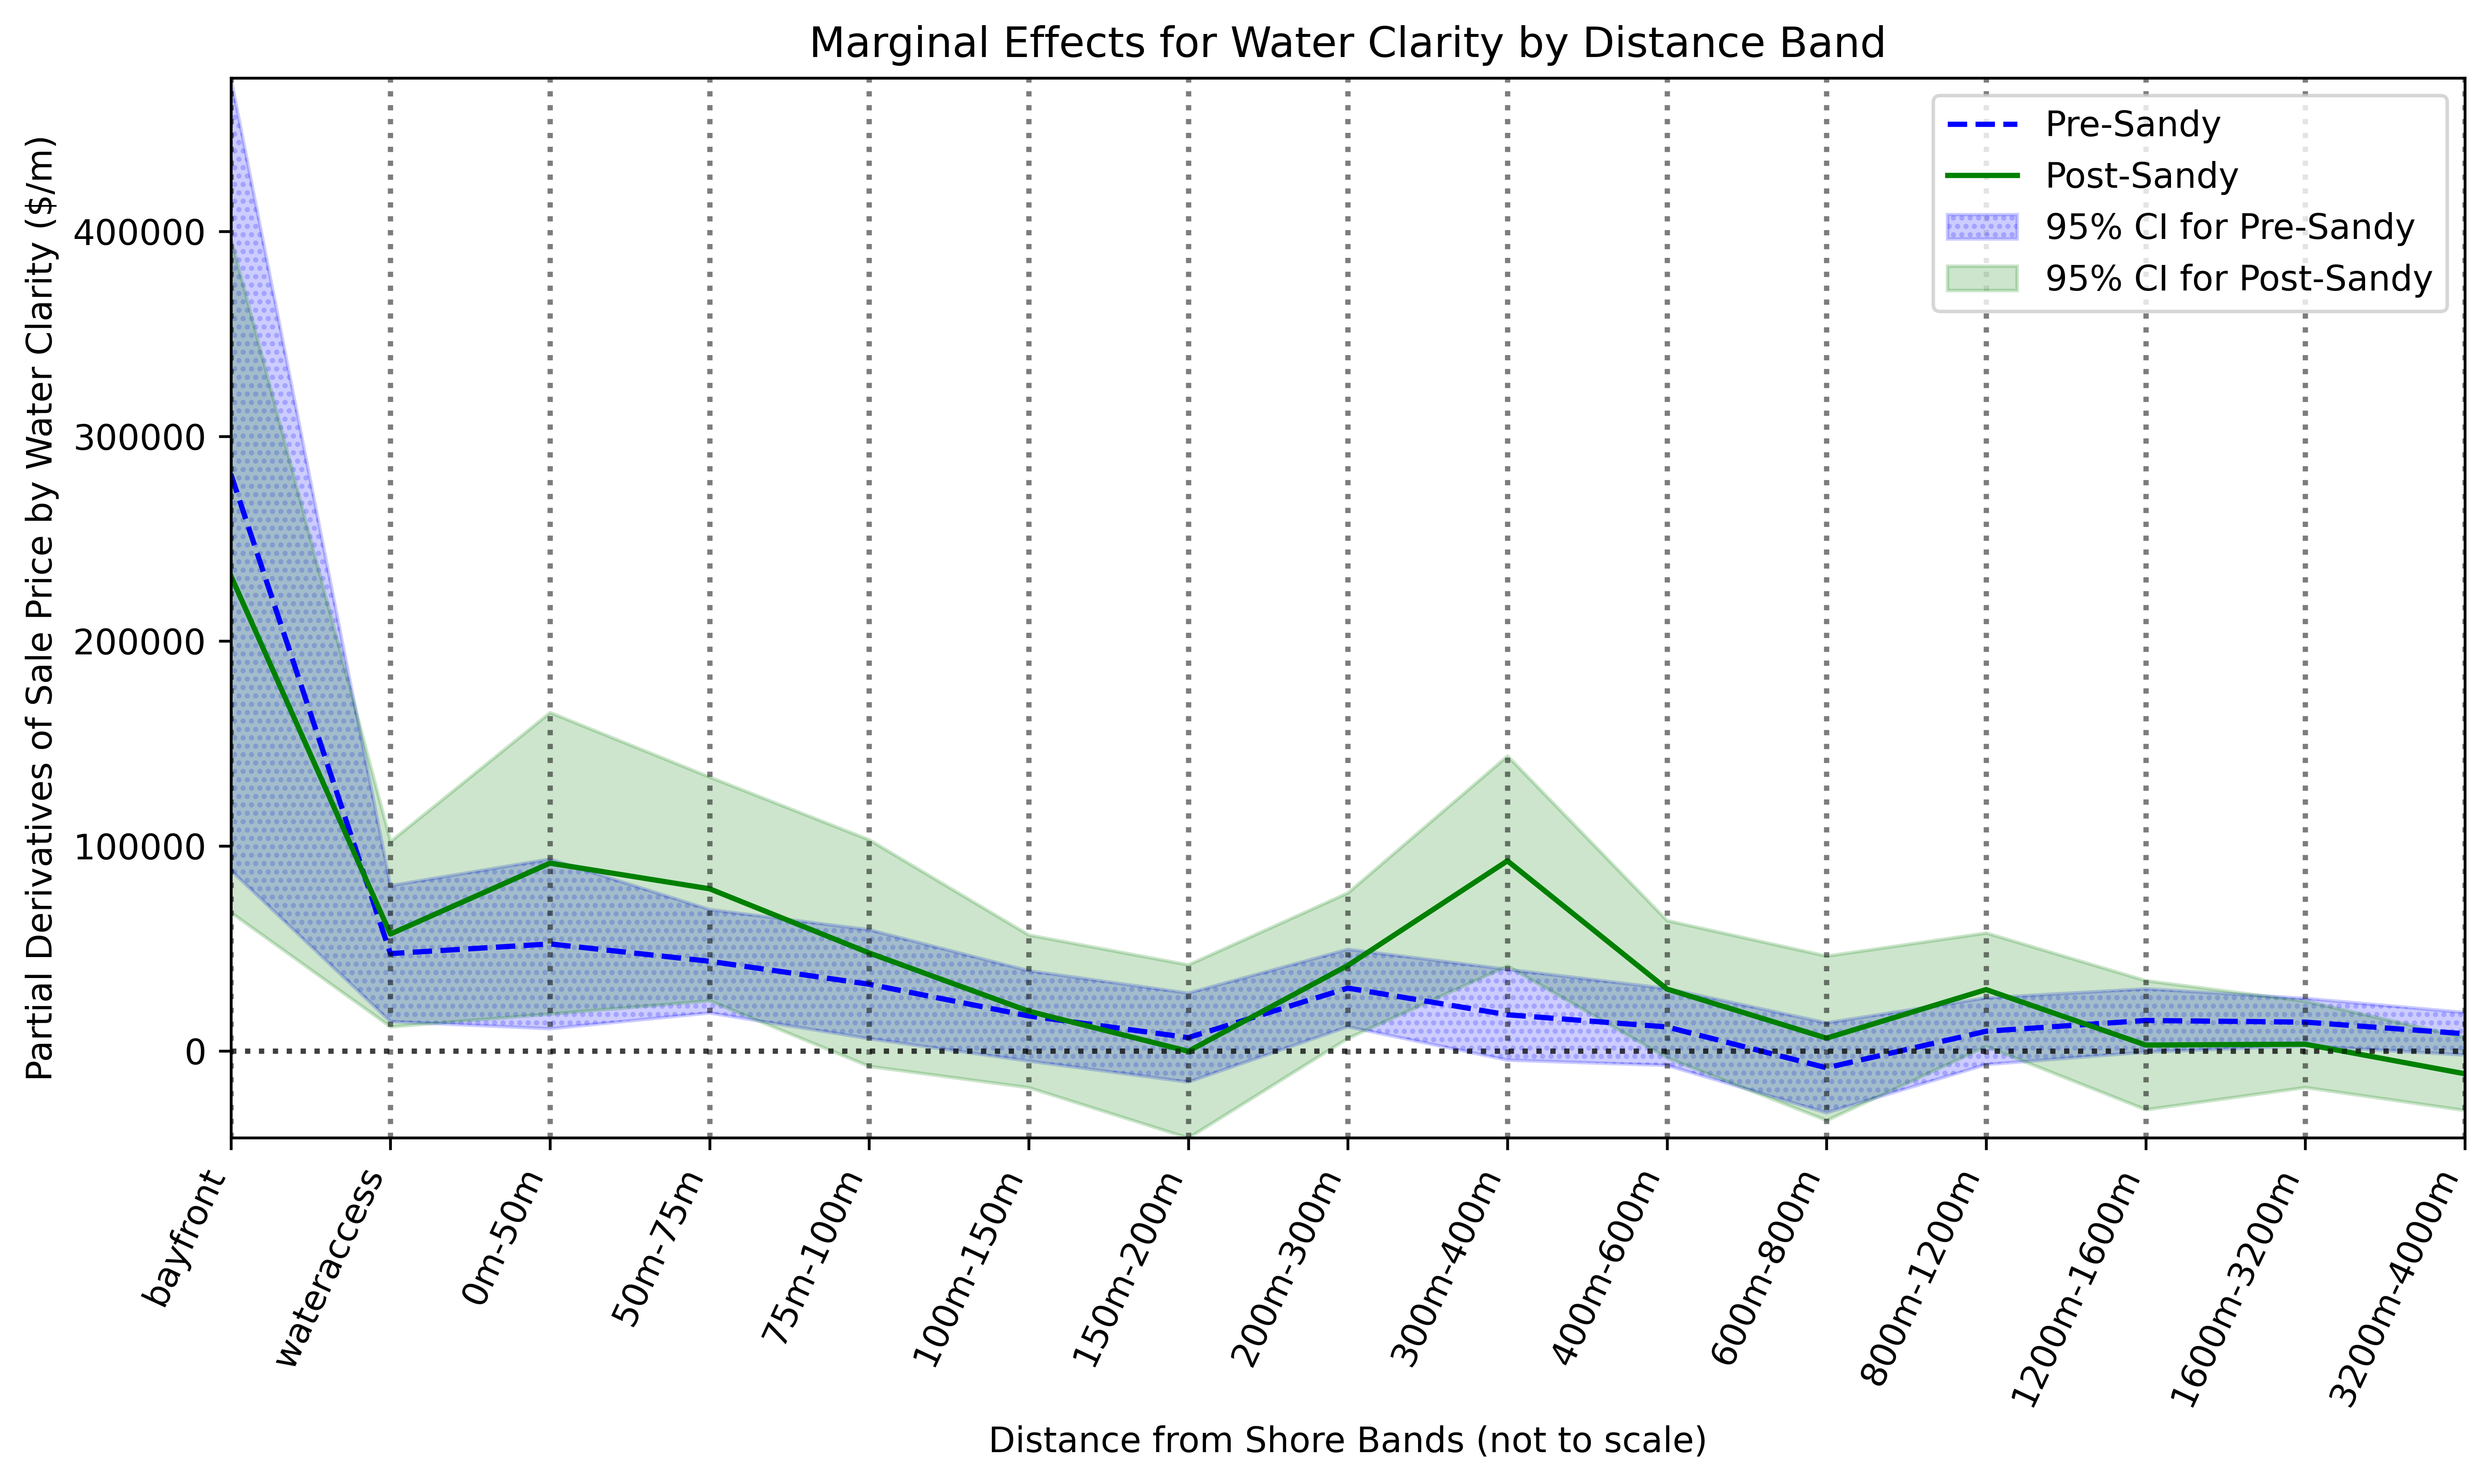

In [17]:
avg_df=idata_obj.createEffectsGraph()

In [18]:
idata_obj.estimateAnnualWQAvgMarginalEffect()

avg marginal effect dwt sum for period0 = 16998.14847086812
at r=0.03, annual benefits for period0 = 509.9444541260436
avg marginal effect dwt sum for period1 = 21364.556524891123
at r=0.03, annual benefits for period1 = 640.9366957467337


In [19]:
-

SyntaxError: invalid syntax (476313318.py, line 1)

In [ ]:
idata_obj.bigX_dist_avg_df.index


In [ ]:
idata_obj.bigX_dist_avg_df.columns

In [ ]:
idata_obj.bigX_dist_avg_df.loc['Distance to Shoreline 0m-50m','distance_shoreline']


In [ ]:
import mlflow
mlflow.end_run()

In [ ]:
idata_obj.dist_avg_df.loc[:,'dv_2002']

In [ ]:
newdf=idata_obj.dist_avg_df.sum()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
newdf.loc['sale_year']

In [ ]:
newdf*.05

In [ ]:
idata_obj.df_raw